## Árbol de Regresión - Predicción de SalePrice
En este análisis aplicaremos un árbol de regresión utilizando únicamente las variables numéricas seleccionadas.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import make_column_selector as selector

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')


## Preprocesamiento - Eliminación de NaN (simplificado)
Se imputan valores faltantes con la mediana para cada columna numérica.

In [27]:
df = pd.read_csv("train.csv")

variables_numericas = [
'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]

In [28]:

df = df.fillna(df.median())

### Separar variables predictoras y variable objetivo
La variable objetivo es `SalePrice`.

In [29]:
X = df.drop(columns=['SalePrice'])
y = np.log(df['SalePrice'])  # Usamos log(SalePrice)

### Dividir en conjunto de entrenamiento y prueba

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Configurar Pipeline y Árbol de Regresión
##### Escalamos variables numéricas para estandarizar.


In [ ]:

numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('num', numerical_preprocessor, X.columns)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=123))
])

### Búsqueda de mejor profundidad (max_depth) con GridSearchCV


In [ ]:
# Se evaluarán profundidades entre 2 y 10.
param_grid = {'regressor__max_depth': np.arange(2, 11)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

### Entrenamiento del modelo

In [ ]:
grid_search.fit(X_train, y_train)
print(f"Mejor profundidad seleccionada: {grid_search.best_params_['regressor__max_depth']}")


Mejor profundidad seleccionada: 7


### Predicción y evaluación sobre el conjunto de prueba

In [ ]:
y_pred = grid_search.predict(X_test)

### Métricas de evaluación

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.1263
MSE: 0.0347
R²: 0.7953


### Visualización - Gráfica Predicciones vs Valores Reales

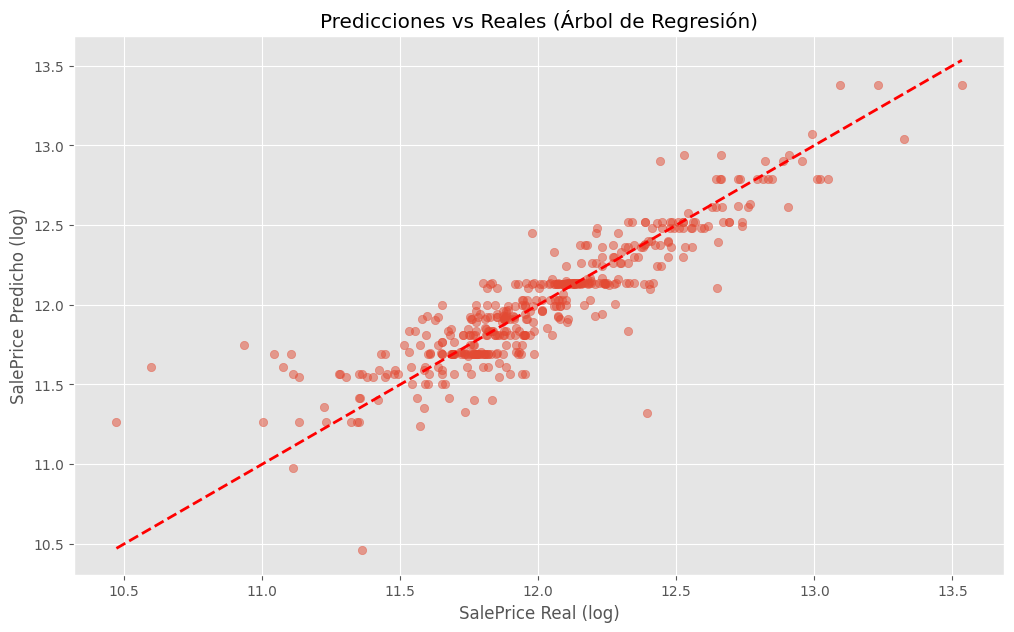

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("SalePrice Real (log)")
plt.ylabel("SalePrice Predicho (log)")
plt.title("Predicciones vs Reales (Árbol de Regresión)")
plt.show()

### Visualización - Residuales vs Valores Predichos

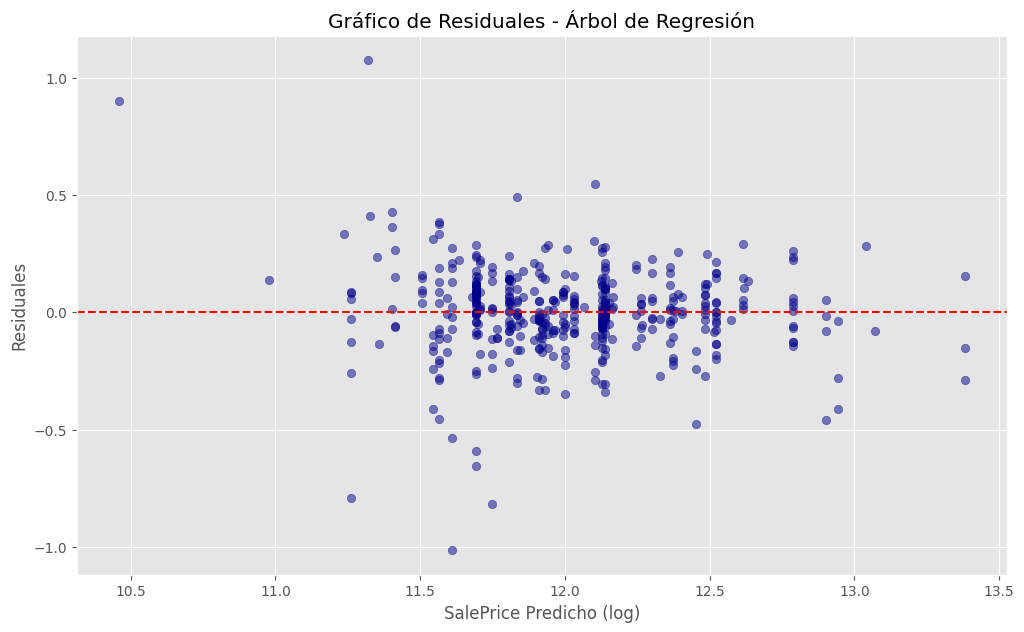

In [ ]:
residuales = y_test - y_pred
plt.scatter(y_pred, residuales, alpha=0.5, color='darkblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("SalePrice Predicho (log)")
plt.ylabel("Residuales")
plt.title("Gráfico de Residuales - Árbol de Regresión")
plt.show()

### Visualización - Histograma de Residuales

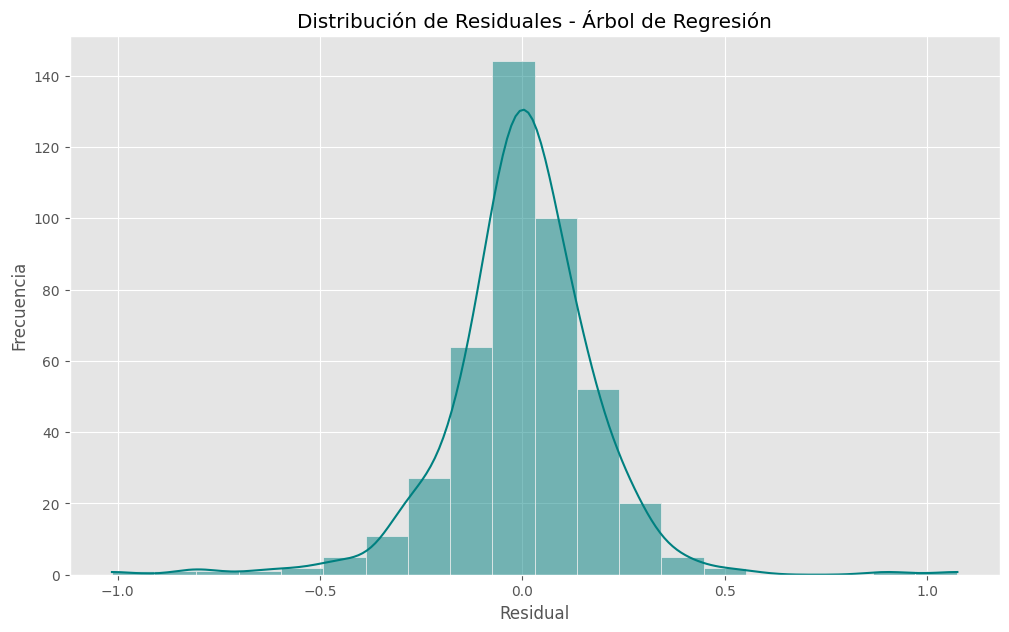

In [ ]:
sns.histplot(residuales, kde=True, color="teal", bins=20)
plt.title("Distribución de Residuales - Árbol de Regresión")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()